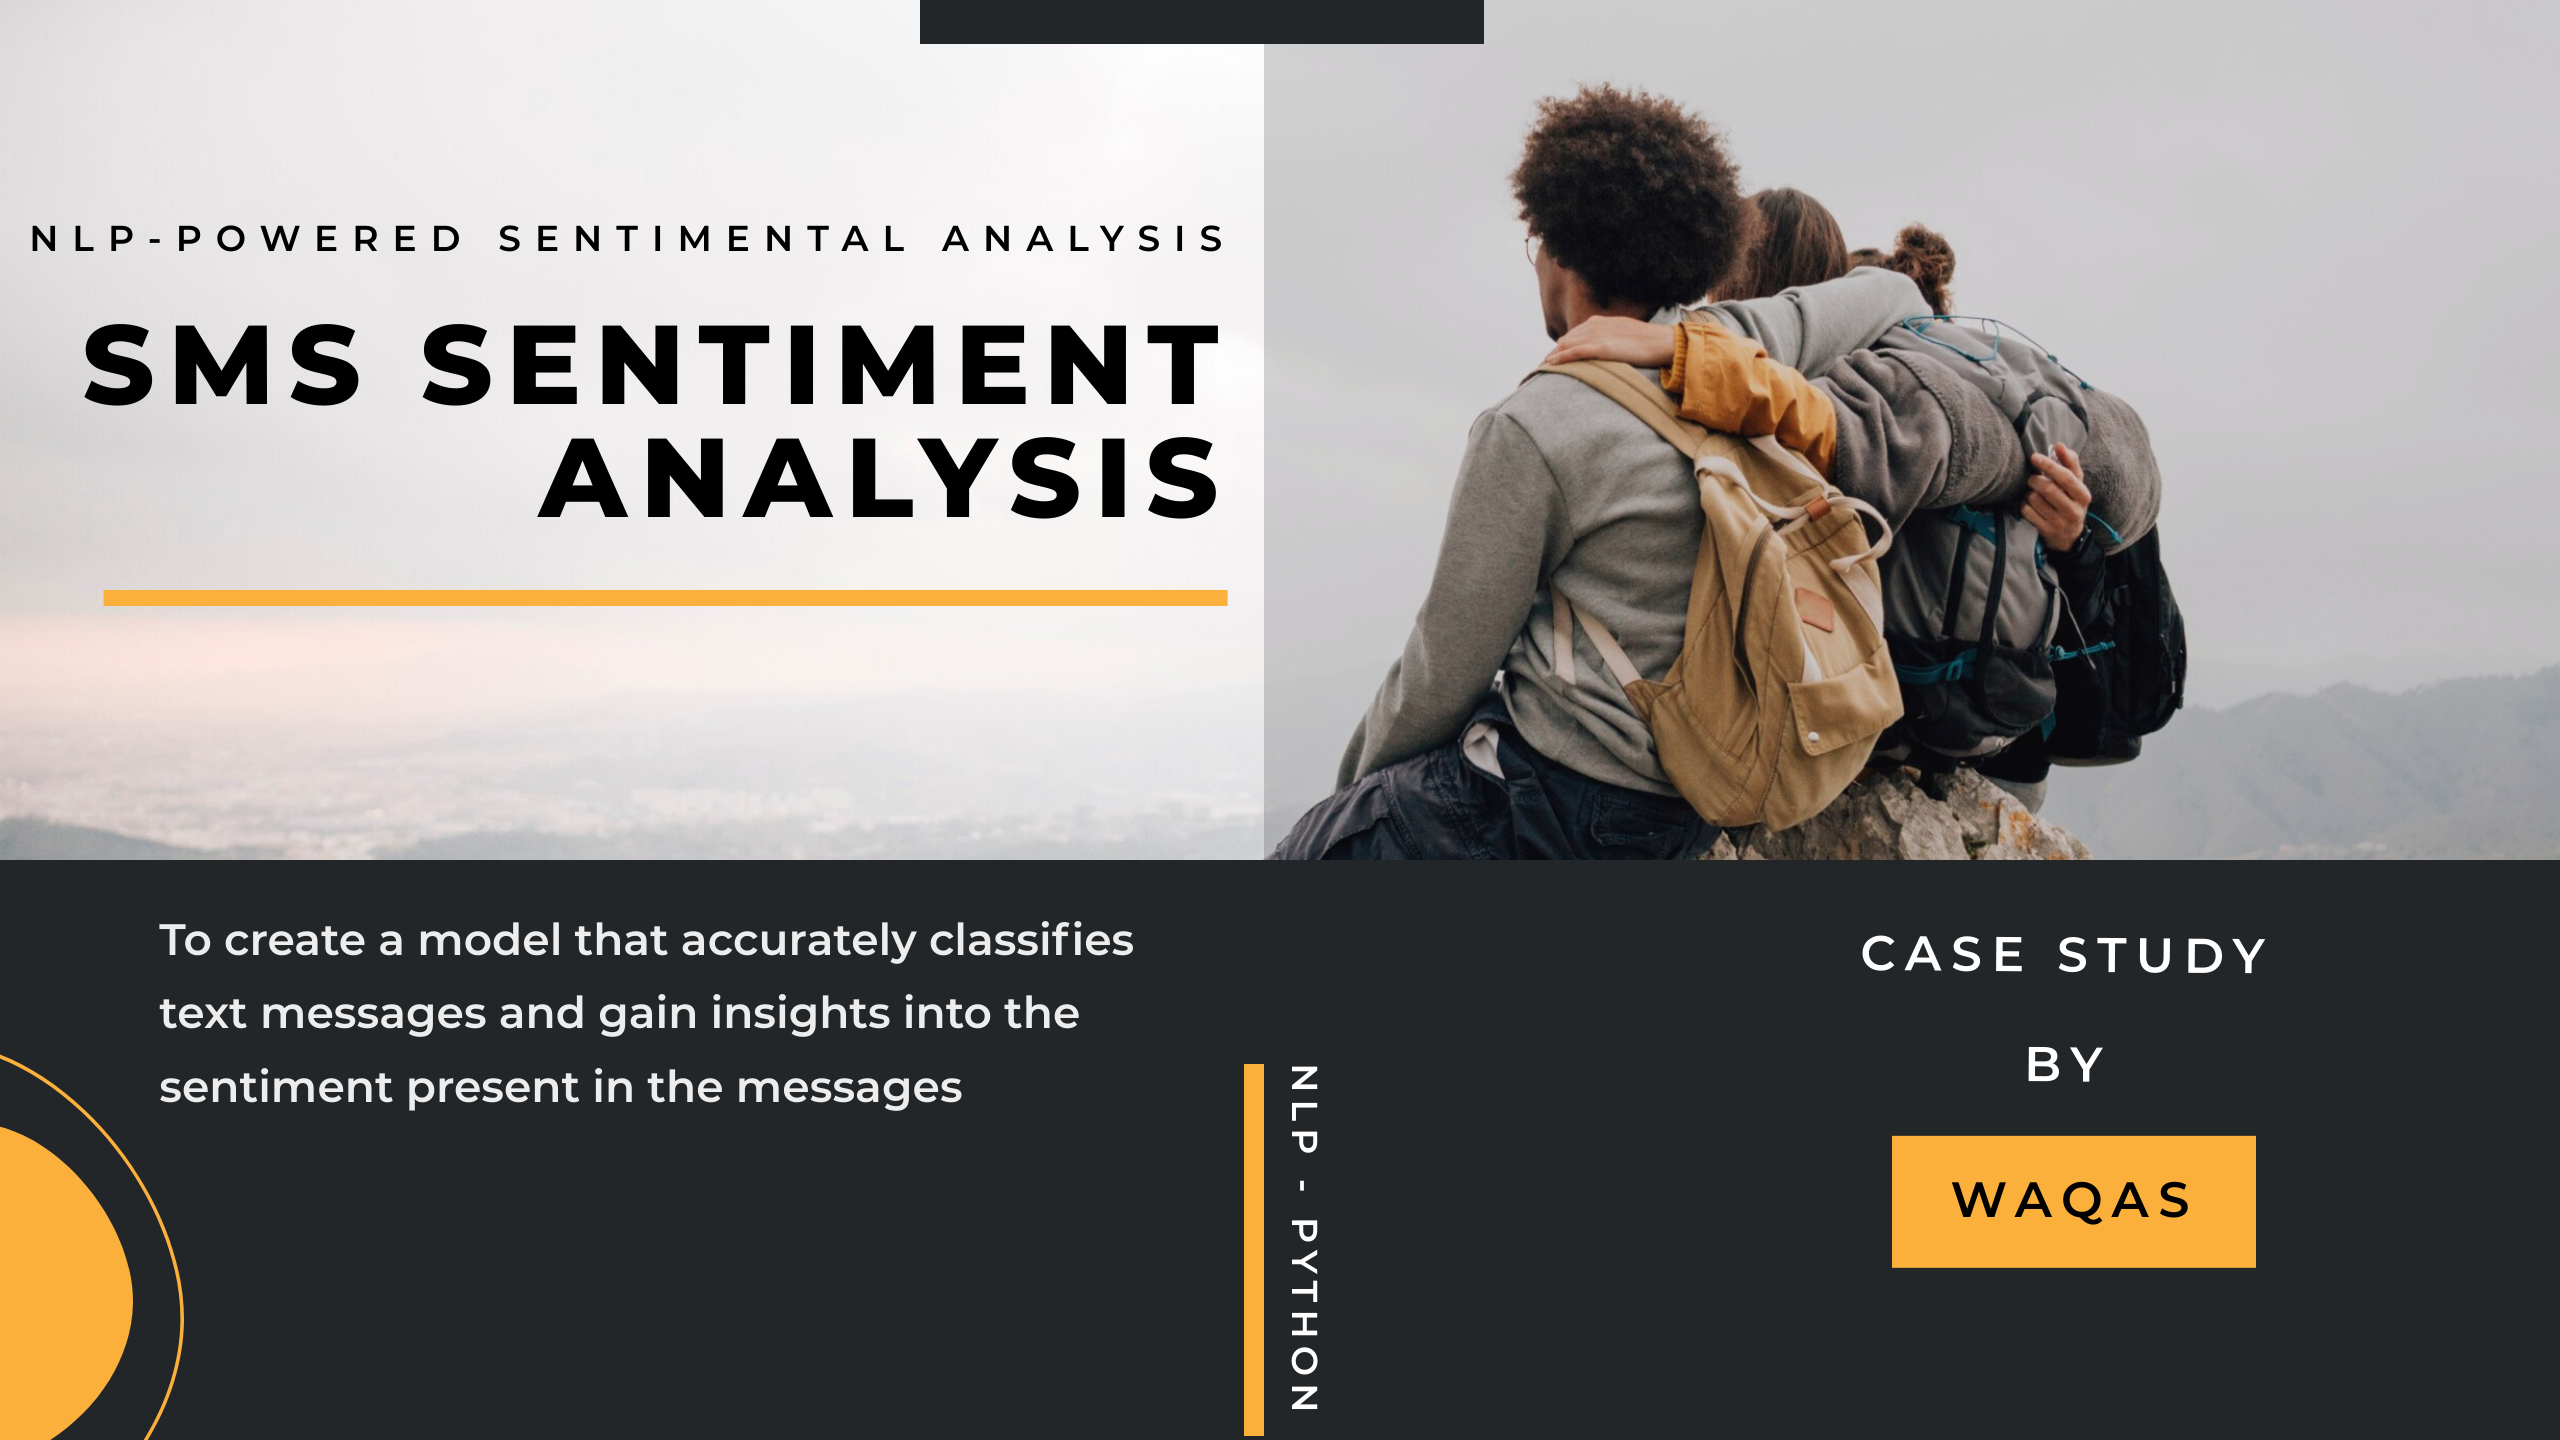

<div style='text-align: center;'>
    <h2><strong>SMS SENTIMENT ANALYSIS</strong></h2>
    <h5 style='text-align: center;'> To create a model that accurately classifies text messages and to gain insights into the sentiment present in the messages</h5>
<p style='text-align: right;'> <i> A case study by Waqas Ahmad</i> </p>
</div>

### 1. Introduction

This project focuses on performing comprehensive sentiment analysis on a dataset containing SMS chat messages. The primary objective is to create a model that accurately classifies text messages and to gain insights into the sentiment present in the messages. Additionally, we aim to compare the general sentiment of messages across different countries, exploring patterns and variations in communication styles.

### 2. Language and Libraries

The project is implemented using the Python programming language, leveraging various libraries for data analysis and natural language processing (NLP). The key libraries used include:

- Python: The primary programming language for data analysis and processing.
- Pandas: Utilized for data manipulation, exploration, and structuring.
- NLTK (Natural Language Toolkit): Applied for advanced NLP tasks such as tokenization and sentiment analysis.
- Matplotlib and Seaborn: Used for data visualization to present insights effectively.

### 3. Dataset

The dataset employed in this project is derived from a CSV file named `clean_nus_sms.csv`. This dataset comprises SMS chat data and encompasses several important columns:

- `id`: A unique identifier for each message.
- `Message`: The actual text content of the SMS messages.
- `length`: The character length of each message.
- `country`: The country or origin of the sender.
- `Date`: The date on which each message was sent.



### 4. [Stages](#stages) 
- [Data Import & Overview](#import)
- [Planning Analysis](#planning)
- [Choosing NLP Model/Technique](#choosing-nlp)
- [Text Preprocessing](#text_preprocessing)
- [Analysis](#analysis)
  - [Exploratoray Data Analysis](#eda)
  - [Sentiment Analysis](#sa)
- [Feature Selection for classifier](#feature)
- [Data Splitting](#splitting)
- [Model Selection](#model_selectione)
- [Message Classification/ Model Evaluation](#classification)
- [Sentiment Distribution & Analysis by Country](#sentiment_distribution)
- [Conclusion & Insights](#conclusion)
- [Future Directions](#future)

### 5. Data Preprocessing

#### 5.1. Data Import and Overview

The initial step involves importing the dataset using Pandas and obtaining a holistic understanding of the data structure through functions like `.head()` and `.info()`.

#### 5.2. Text Preprocessing

Text preprocessing is pivotal to ensure the reliability of sentiment analysis. Key preprocessing steps include:

- Eliminating empty messages: Rows with missing or empty messages are removed.
- Text normalization: All text is converted to lowercase to ensure consistent analysis.
- Punctuation removal: Punctuation marks are stripped from the text.
- Tokenization: The text is split into individual words or tokens.
- URL and HTML tag removal: Any URLs and HTML tags are removed from the messages.

### 6. Sentiment Analysis

#### 6.1. Sentiment Model

A Naive Bayes classifier from the NLTK library is employed for sentiment analysis. To train this model, a labeled dataset containing positive and negative sentiments is used as a reference. The classifier learns from this data to make predictions on the sentiment of SMS messages.

#### 6.2. Model Evaluation

The Naive Bayes classifier exhibits impressive performance, achieving an accuracy rate of approximately 99.63% on the test set. Additionally, the model identifies the most informative features for sentiment prediction, aiding in interpreting its decision-making process.

#### 6.3. Sentiment Classification

With the trained model, sentiment classification is applied to each message within the dataset. Messages are categorized as either positive or negative based on their sentiment scores.

### 7. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an integral part of the project, helping to uncover underlying patterns and trends in the dataset. Key aspects of the EDA include:

- Distribution of Messages by Country: Visualizations showcase the number of messages sent from each country, highlighting the most active countries.
- Sentiment Distribution: Visualization and analysis of the distribution of sentiment in the dataset, including the proportion of positive and negative messages.

### 8. Results and Insights

#### 8.1. Sentiment Distribution

An analysis of the sentiment distribution reveals that approximately 64.3% of the messages are classified as negative, while around 35.8% are classified as positive. This suggests a prevalence of negative sentiment in the SMS messages.

#### 8.2. Sentiment Analysis by Country

The sentiment analysis is further dissected by country to determine which countries exhibit a higher proportion of positive or negative messages. Key insights include:

- Trinidad and Tobago: This country has the highest proportion of positive messages.
- Barbados: Barbados has the highest proportion of negative messages.

These findings provide valuable insights into the sentiment expressed in SMS communication across different regions.

### 9. Conclusion and Future Directions

In conclusion, this project successfully conducts sentiment analysis on SMS chat data, offering valuable insights into the sentiment patterns within the dataset. The Naive Bayes classifier demonstrates remarkable accuracy, but further model enhancements and evaluations are recommended for robust generalization to new data.

Future directions for this project may include:

- Evaluating and implementing more advanced sentiment analysis models.
- Hyperparameter tuning to optimize model performance.
- Analyzing the impact of sentiment on specific date ranges or events.
- Exploring potential correlations between sentiment and message length.

Overall, this project serves as a foundational analysis of SMS chat data, offering valuable insights into communication patterns and sentiment expressions across different countries.


## Project Execution
***

### Data Import & Overview <a class="anchor" id="import"></a>

To begin, I imported the libraries and data I will use for the portfolio project. Here I used `pandas` to create a DataFrame with the data with the `pd.read_csv()` method.

In [1]:
# Import pandas with alias
import pandas as pd

In [2]:
# Import the SMS data as a pandas DataFrame
df = pd.read_csv('clean_nus_sms.csv', index_col=0)

Now that I have the DataFrame created, I can view a sample of the DataFrame with the `.head()` method.

In [3]:
# Check data
df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


I can take a quick look at shape of the DataFrame and the type of each variable with the `.info()` method.

In [4]:
# View DataFrame shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 55834
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48598 non-null  int64 
 1   Message  48595 non-null  object
 2   length   48598 non-null  object
 3   country  48598 non-null  object
 4   Date     48598 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


Some notes
* The `Message` variable has 3 fewer values than the other variables, which will need to be addressed.
* All of the values in the DataFrame are strings, except for the `id` variable.
* There are 48,598 messages present in the DataFrame.

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

## Planning Analysis <a class="anchor" id="planning"></a>

Now that I understand the data, I'm interested in its applications. 

Text messages provide valuable insights into how people communicate. I plan to perform sentiment analysis on the `Message` variable and explore how sentiment differs between countries using the NUS SMS Corpus.

The goal is to build a text classification model to analyze sentiment and compare it across countries in the dataset.

## Choose an NLP model or technique <a class="anchor" id="choosing-nlp"></a>

To accomplish this, I plan to include the following NLP tasks:

* Text preprocessing using regex and NLTK.
* Exploratory data analysis with pandas and seaborn.
* Sentiment analysis using bag-of-words and a Naive Bayes classifier.

## Conduct text preprocessing <a class="anchor" id="text_preprocessing"></a>

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

In this solution, I want to remove unnecessary characters and words and standardize the casing, so the following text preprocessing tasks are helpful: 

* Noise Removal
    * Empty messages
    * Punctuation
    * Stopwords
    * URLs
    * HTML Tags

* Text Normalization 
    * Lower Casing

### Remove empty messages

First, I want to remove any rows without a message. I'll do this with the pandas `.dropna()` method.

In [5]:
df = df.dropna()
len(df)

48595

It looks like I removed 3 blank messages!

### Lower case message data

My next step in preprocessing is to set all of the characters to lower case by chaining the `.str()` method to convert the pandas Series so that the `.lower()` method can be applied to lower case each string in the column.

In [6]:
# Set all characters to lower case in Message
df["Message_clean"] = df["Message"].str.lower()
# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


### Remove punctuation

Now that all of the characters are in lower case, I will use the same approach for removing punctuation. I will chain the `.str()` method with the `.replace()` method to remove any punctuation.

In [7]:
# Remove punctuation from Message variable with explicit regex parameter
df["Message_clean"] = df["Message_clean"].str.replace('[^\w\s]', '', regex=True)

# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Remove stopwords

Removing stopwords is an effective approach when conducting most NLP techniques. However, for sentiment analysis, valuable information could be lost when stopwords are removed. I'll take a look at the English stopwords in NLTK to determine if it would be best to remove them.

In [8]:
# Import NLTK library (Natural Language Toolkit) library in Python
import nltk

In [ ]:
nltk.download('stopwords')

In [10]:
# Import the stopwords module from the NLTK (Natural Language Toolkit) corpus package.
from nltk.corpus import stopwords

# Call the 'words' function from the 'stopwords' module to get a list of stopwords in English.
# Stopwords are common words (e.g., 'the', 'and', 'is') that are often removed from text data
# because they are considered to have little semantic meaning.
stopwords_list = stopwords.words('english')

# Join the list of stopwords into a single string with words separated by commas.
# This makes it easier to display the stopwords as a comma-separated list.
stopwords_str = ", ".join(stopwords_list)

# Print or use 'stopwords_str' to view the stopwords in English.
print(stopwords_str)

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

Considering that removing these stopwords from the `Message` variable could potentially alter the meaning of some of the messages, or alter sentiment within them, I will leave these words in.

### Remove URLs

For some datasets, URL removal is a useful component of the text preprocessing phase, so I'll remove them here using regular expressions.

In [11]:
# Import the 're' module to work with regular expressions
import re

# Define a function to remove URLs from a given text
def remove_urls(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    
    # Use the 'sub' method of the regular expression pattern to replace URLs with an empty string
    # This effectively removes URLs from the input text
    cleaned_text = url_pattern.sub('', text)
    
    # Return the cleaned text with URLs removed
    return cleaned_text

In [12]:
# As we have already defined the 'remove_urls' function

# Apply the 'remove_urls' function to each element in the "Message_clean" column of the DataFrame 'df'
# The lambda function takes each text in the "Message_clean" column as input and removes URLs
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_urls(text))

# View the first 5 rows of the DataFrame to see the changes
df.head()


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Remove HTMLs

Similarly, I will remove the HTML tags using the re library's `.compile()` method.

In [13]:
# Define a function to remove HTML tags from a given text
def remove_html(text):
    """
    Remove HTML tags from a given text.

    Parameters:
        text (str): The input text containing HTML tags.

    Returns:
        str: The cleaned text with HTML tags removed.
    """
    # Define a regular expression pattern to match HTML tags
    html_pattern = re.compile('<.*?>')
    
    # Use the 'sub' method of the regular expression pattern to replace HTML tags with an empty string
    # This effectively removes HTML tags from the input text
    cleaned_text = html_pattern.sub('', text)
    
    # Return the cleaned text with HTML tags removed
    return cleaned_text


In [14]:
# Apply the 'remove_html' function to each element in the "Message_clean" column of the DataFrame 'df'
# The lambda function takes each text in the "Message_clean" column as input and removes HTML tags
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_html(text))

# View the first 5 rows of the DataFrame to see the changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Tokenize cleaned messages

I will need tokenized messages to do my sentiment analysis later. I will use the `word_tokenize` module from `nltk`.

In [47]:
# Import the 'word_tokenize' function from the NLTK tokenization module
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer data if it hasn't been downloaded already
 nltk.download('punkt')

# Tokenize the cleaned messages and create a new column 'Message_tokenized' to store the tokenized results
# The lambda function takes each row (x) and tokenizes the 'Message_clean' column using 'word_tokenize'
df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)

# View the first 5 rows of the DataFrame to see the tokenized messages
df.head()


,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiment,Sentiment_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",Negative,-1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",Negative,-1
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai...",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",Negative,-1


In [16]:
# Save the preprocessed DataFrame
df.to_csv('processed_clean_nus_sms.csv', header = True)

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

## Conducting Analysis<a class="anchor" id="analysis"></a>

Terrific! Now it is time to conduct my analysis.

### Exploratory Data Analysis <a class="anchor" id="eda"></a>

Now that I have my preprocessed dataset, I will perform exploratory data analysis. Here I will focus on creating visualizations to get a better understanding of the data and any patterns.

In [17]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Magic function for plotting in notebook
%matplotlib inline

I will start with the `country` category to get an idea of how many countries there are in the DataFrame. I will use the `.nunique()` method to find out the number of unique values in the `country` column.

In [18]:
# Count the number of unique countries
df['country'].nunique()

40

I can also view how many messages were sent from each country using the `.value_counts()` method. 

In [19]:
# View message count by country
df['country'].value_counts()

Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Turkey                    10
Trinidad and Tobago       10
Lebanon                   10
Slovenia                  10
Nigeria                   10
New Zealand               10
Macedonia                 10
UK                        10
Morocco                    9
Romania                    9
Australia     

I can see that I need to clean the values in `country`. For instance, `SG` represents the country code for Singapore. Likewise, `USA` represents the United States. I'll use the `.replace()` method to assign the correct values for each country.

In [20]:
# Correct values
df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})
#count the real number of unique countries
df['country'].nunique()

33

In [21]:
# View message count by country
df['country'].value_counts()

Singapore              31817
India                   7085
United States           5680
Sri Lanka               1047
Malaysia                 767
Pakistan                 751
Unknown                  602
Canada                   198
Bangladesh               126
China                    107
Philippines               67
Indonesia                 48
United Kingdom            40
Nepal                     39
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Trinidad and Tobago       10
Lebanon                   10
Turkey                    10
Nigeria                   10
New Zealand               10
Slovenia                  10
Macedonia                 10
Morocco                    9
Australia                  9
Romania                    9
Jamaica                    8
Barbados                   8
Spain                      5
France                     5
Name: country, dtype: int64

I'll visualize the top ten most frequently occurring countries with a barplot.

<Axes: >

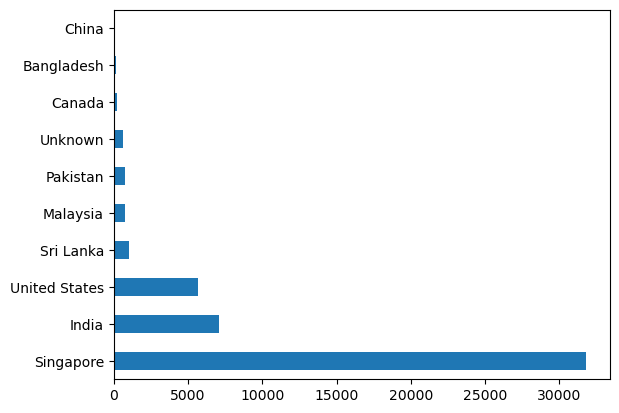

In [22]:
# Number of messages per country
country_value_counts = df['country'].value_counts() 

# Number of messages per country for the top 10 most active countries
top_10_country_value_counts = country_value_counts.head(10) 

# Plot a bar chart using pandas built-in plotting apis
top_10_country_value_counts.plot.barh() 

Here I can glean that users from Singapore, India, and the United States sent the majority of messages. 

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

### Sentiment Analysis <a class="anchor" id="sa"></a>

Now that I have conducted some light EDA, I will move on to sentiment analysis. There are several approaches one can take to analyzing sentiment of text data, and I will primarily use models from the NLTK library. Here a message will be categorized into one of two categories:

* Positve
* Negative

I will use Naive Bayes classification to determining the sentiment of the messages in the `Message` variable. This will involve using Twitter data with known sentiments to create a classifier. 


In [ ]:
# Download Twitter data for sentiment analysis
nltk.download('twitter_samples')

# Download the part-of-speech tagger for Twitter data
nltk.download('averaged_perceptron_tagger')

# Download the WordNet lexical database (used for lemmatization in NLP tasks)
nltk.download('wordnet')

After downloading the Twitter data from the `nltk` library, I will import it from `nltk.corpus` as `twitter_samples`.

In [24]:
# import the twitter data
from nltk.corpus import twitter_samples

My first step is to instantiate the tweets that have been labeled as positive and negative, in order to create a training set that can be fed into the classifier.

In [25]:
# Instantiate positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

I will take a quick peek into the types of tweets and their distributions with indexing and `len()`.

In [26]:
# View first positive tweet
print(positive_tweets[0:2])

# View number of positive tweets
print('There are {} positive tweets.'.format(len(positive_tweets)))

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!']
There are 5000 positive tweets.


In [27]:
# View first negative tweet
print(negative_tweets[0:2])
# View number of negative tweets
print('There are {} negative tweets.'.format(len(negative_tweets)))

['hopeless for tmr :(', "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :("]
There are 5000 negative tweets.


I can see that the number of positive to negative samples used to assemble the training set is evenly distributed. I need to tokenize the tweets.

Tokenization is a fundamental step in preparing text data for analysis or modeling in NLP tasks. It allows you to transform unstructured text into structured data that can be used for a wide range of text analysis purposes, including sentiment analysis, which involves determining the sentiment or emotional tone expressed in a piece of text

In [28]:
# Create tokens from the positive tweets
# Tokenize positive tweets
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# Show the first tokenized tweet
print(pos_tweet_tokens[0])

# Create tokens from the positive tweets
#Tokenize negative tweet
neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
# Show the first tokenized tweet
print(neg_tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


Since I removed HTML tags and URLs in the SMS data, I'll do the same for the tweets. I'll use the same functions for this as I defined above.

In [29]:
# Define lists for preprocessed tokens
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

# Positive tokens
for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    positive_cleaned_tweets_list.append(cleaned_tweet)

# Negative tokens
for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    negative_cleaned_tweets_list.append(cleaned_tweet)

# Print preprocessed token lists
print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

### Feature Selection <a class="anchor" id="feature"></a>

Now I need to select the **features for my classifier**. 
I will select the **most common words** in my corpus because I assume that these words are the **best indicators** if something is positive or negative. I will use a **frequency distribution** to select them

In [30]:
#create a list of all the tweets
list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list

#turn my list of lists into a flat list of tokens
#It iterates through each sublist (individual tweets) within list_of_all_tweets, 
#and for each token in each tweet, it adds that token to the all_tweet_tokens list. 
#Essentially, it's converting a list of lists (tweets) into a single list (tokens).

all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is

len(all_tweet_tokens)

130052

In [31]:

# Create a frequency distribution of all the words.
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

# Inspect the result
print(len(all_tokens))  # Print the total number of unique words in the dataset
print(all_tokens.most_common(10))  # Print the ten most common words and their frequencies

# Select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

# Check what this list looks like
sentiment_features[:5]  # Print the first five words from the list of selected features


22690
[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


[':(', ':)', '!', 'I', '.']

Now I need to create a feature extractor that identifies when a feature is present in a message.

In [32]:
def document_features(document, sentiment_features):
    """
    Create a feature vector for a document based on the presence or absence of selected features (words).

    Args:
        document (list of str): The input document, represented as a list of tokens (words).
        sentiment_features (list of str): The list of selected features (words) to check for in the document.

    Returns:
        dict: A feature vector represented as a dictionary. Each key is a feature (word),
              and the corresponding value is True if the feature is present in the document, or False if absent.
    """
    # Make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    # For all my features, check if that feature is in my target message
    for token in sentiment_features:
        # Create a dictionary entry for each feature
        # The key is the feature (word), and the value is True if the feature is present, False if absent
        features[token] = (token in document_tokens)
    return features

# Test it on a sample sentence
test_sentence = "Hello from my working desk, they call me wicky :)".split(" ")  # Split the sentence into tokens

# Print the feature vector for the test sentence
print(document_features(test_sentence, sentiment_features))


{':(': False, ':)': True, '!': False, 'I': False, '.': False, 'to': False, 'you': False, 'the': False, '': False, ',': False, 'a': False, 'and': False, '(': False, '?': False, 'for': False, 'my': True, 'it': False, 'in': False, 'is': False, 'me': True, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': False, ')': False, 'this': False, 'but': False, 'that': False, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': False, 'like': False, 'with': False, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': False, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': False, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': False, 'time': False, '..': False, 'out': False, 'miss': False, 'Thanks': False, "don't": False, 'if': 

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

#### Data Splitting <a class="anchor" id="splitting"></a>
Now I need to create training and testing sets, and label them accordingly. 
- 70% of the tweets will be used for the training set
- 30% for the testing set
- Using the `random` library, I can randomly select the tweets for each.

In [33]:
# Import the random library to shuffle the dataset
import random

# Create positive and negative datasets from my lists of tokenized tweets
positive_tw = [(tweet, "Positive") for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, "Negative") for tweet in negative_cleaned_tweets_list]

# Create the combined dataset by concatenating positive and negative tweets
all_labeled_tweets = positive_tw + negative_tw

# Initialize the random number generator with a seed for reproducibility
random.seed(42)

# Shuffle the order of the dataset in place to ensure randomness preventing any order-based bias in the training and test sets.
random.shuffle(all_labeled_tweets)

# Create a list of (feature_set, sentiment) pairs for all the features in the tweets
feature_set = [(document_features(d, sentiment_features), c) for (d, c) in all_labeled_tweets]

# Separate the dataset into the training and testing sets
# The first 7000 samples will be used for training, and the rest for testing
train_set, test_set = feature_set[:7000], feature_set[7000:]

# These sets will be used to train and evaluate the sentiment analysis model.

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

### Model Selection <a class="anchor" id="model_selection"></a>

- I will use `NaiveBayesClassifier` model with my training and testing sets to build my sentiment model
- I will use `classify()` function to test the performance of my model on my training set


Naive Bayes Classifier with the classify() function is a reasonable starting point for sentiment analysis, especially for quick prototyping and baseline performance assessment. However, for robust and state-of-the-art sentiment analysis, i need more advanced models and evaluate their performance on a separate test dataset to ensure reliable generalization.

In [34]:
# Import classify and sentiment analysis model
from nltk import classify
from nltk import NaiveBayesClassifier

# Instantiate a classifier and train on training data (this will take awhile)
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print("Accuracy is:", classify.accuracy(classifier, test_set))

#Show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Accuracy is: 0.9963333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True           

**Insights**
- The Naive Bayes Classifier achieved an impressive accuracy of around 99.63% on the test set and identified informative features. 
- However, it's crucial to remember that high test set accuracy doesn't guarantee strong generalization to new data. 
</br>*For practical applications, additional evaluation and potential model enhancements, like hyperparameter tuning or more sophisticated models, should be considered.*

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

#### Messages Classification using Model <a class="anchor" id="classification"></a>

*Now I will use my model to classify the sentiment of my messages. I will try it out on just one before applying it to the whole corpus.*

In [35]:
# Select one sample message to evaluate
# In this line, we choose a specific message from the dataset for evaluation, here it's the 50th message (index 49).
sample_message = str(df["Message_tokenized"][49])

# Print the selected sample message
print(sample_message)

# Use the classifier to predict the sentiment of the sample message
# We create a feature set for the sample message using the same method as during training.
# Then, we use the classifier to predict the sentiment (Positive or Negative) based on the feature set.
predicted_sentiment = classifier.classify(dict([token, True] for token in sample_message))

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment)


['yup', 'hey', 'then', 'one', 'day', 'on', 'fri', 'we', 'can', 'ask', 'miwa', 'and', 'jiayin', 'take', 'leave', 'go', 'karaoke']
Predicted Sentiment: Negative


The sentiment of the 50th message (`"yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke"`) is Negative per my model. 

Now I will evaluate all the messages in the NUS SMS Corpus.

In [36]:
# Create an empty list to store predicted sentiments
sentiments = []

# Iterate through the column and predict sentiment for each response
# Append the predicted sentiment to the new list 'sentiments'
for message in df['Message_tokenized']:
    # Create a feature set for the message and predict sentiment
    predicted_sentiment = classifier.classify(dict([token, True] for token in message))
    
    # Convert the predicted sentiment to a string and append it to the 'sentiments' list
    sentiments.append(str(predicted_sentiment))

# Add the 'sentiments' list as a new column 'Sentiment' in our DataFrame
df['Sentiment'] = sentiments

# Count and display the distribution of predicted sentiments
sentiment_counts = df['Sentiment'].value_counts()

sentiment_counts

Negative    31207
Positive    17388
Name: Sentiment, dtype: int64

***Insights: There are 31207 Negative and 17388 Positive sentiments predicted***

I want to know what portion of the data is Positive/Negative. I will use the `.value_counts()` method and set `normalize = True` so I get a proportion instead of raw counts.

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

### Sentiment Distribution <a class="anchor" id="sentiment_distribution"></a>

In [37]:
# View the proportion of the corpus in each class
df['Sentiment'].value_counts(normalize = True)

Negative    0.642185
Positive    0.357815
Name: Sentiment, dtype: float64

<Axes: xlabel='Sentiment', ylabel='count'>

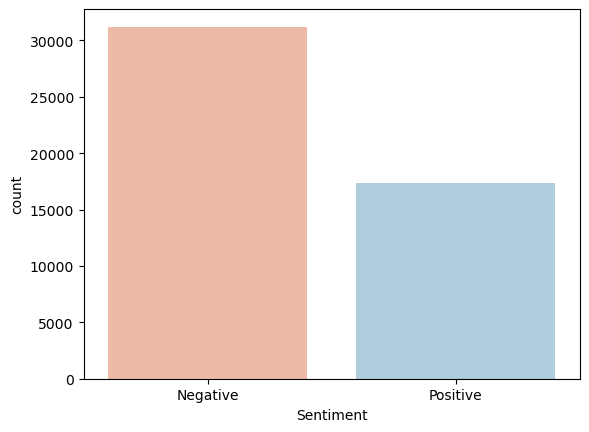

In [38]:
# View distribution in a countplot
sns.countplot(x='Sentiment', data=df, palette='RdBu')

***Insight: My model predicts that 64.3% of the messages in the NUS SMS Corpus are Negative***

Now I want to compare sentiment by country. To make this easier, I will transform my sentiment into a numeric variable. I will assign Positive messages '1' and Negative messages '-1'. 


In [39]:
# Define a function to convert sentiment into binary values
def convert_sentiment(sentiment):
    """
    Takes in sentiments, and converts them to binary values.
    """
    if sentiment == 'Positive':
        return 1
    else:
        return -1

# Create new feature based on the values returned from function
df['Sentiment_score'] = df['Sentiment'].apply(convert_sentiment)

#check 
df.head()

,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiment,Sentiment_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",Negative,-1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",Negative,-1
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai...",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",Negative,-1


Now I will group by country and use the `.mean()` method to get the average sentiment score for each country.

In [40]:
#create a new dataframe grouped by countries and aggregated by the mean.
df_sent = df.groupby(['country']).mean(numeric_only=True)

#reset the index
df_sent.reset_index(inplace=True)

df_sent.head()

,country,id,Sentiment_score
0,Australia,45574.666667,0.111111
1,Bangladesh,39876.301587,-0.190476
2,Barbados,45633.500000,-1.000000
3,Canada,5763.035354,-0.252525
4,China,12499.878505,-0.177570


I want to know which country sends the most positive messages, so I will use the `.sort_values()` method.

In [41]:
# Sort DataFrame by Sentiment_score
df_sent.sort_values(by='Sentiment_score', ascending=False)

,country,id,Sentiment_score
28,Trinidad and Tobago,42105.500000,0.600000
17,Nepal,42863.846154,0.384615
16,Morocco,41835.777778,0.333333
12,Kenya,41594.000000,0.300000
26,Spain,28325.000000,0.200000
18,New Zealand,41672.500000,0.200000
20,Pakistan,6326.893475,0.158455
0,Australia,45574.666667,0.111111
23,Serbia,37749.000000,0.090909
27,Sri Lanka,27548.788921,-0.025788


**Insights:**
- Tobago, Nepal, and Morocco displayed the highest positivity in the sentiment analysis.
- On the contrary, Lebanon, Barbados, and Nigeria exhibited the highest negativity in the sentiment analysis I conducted.

Now I will plot the sentiment by country to see which countries are the most Positive/Negative.

<Axes: xlabel='country', ylabel='Sentiment_score'>

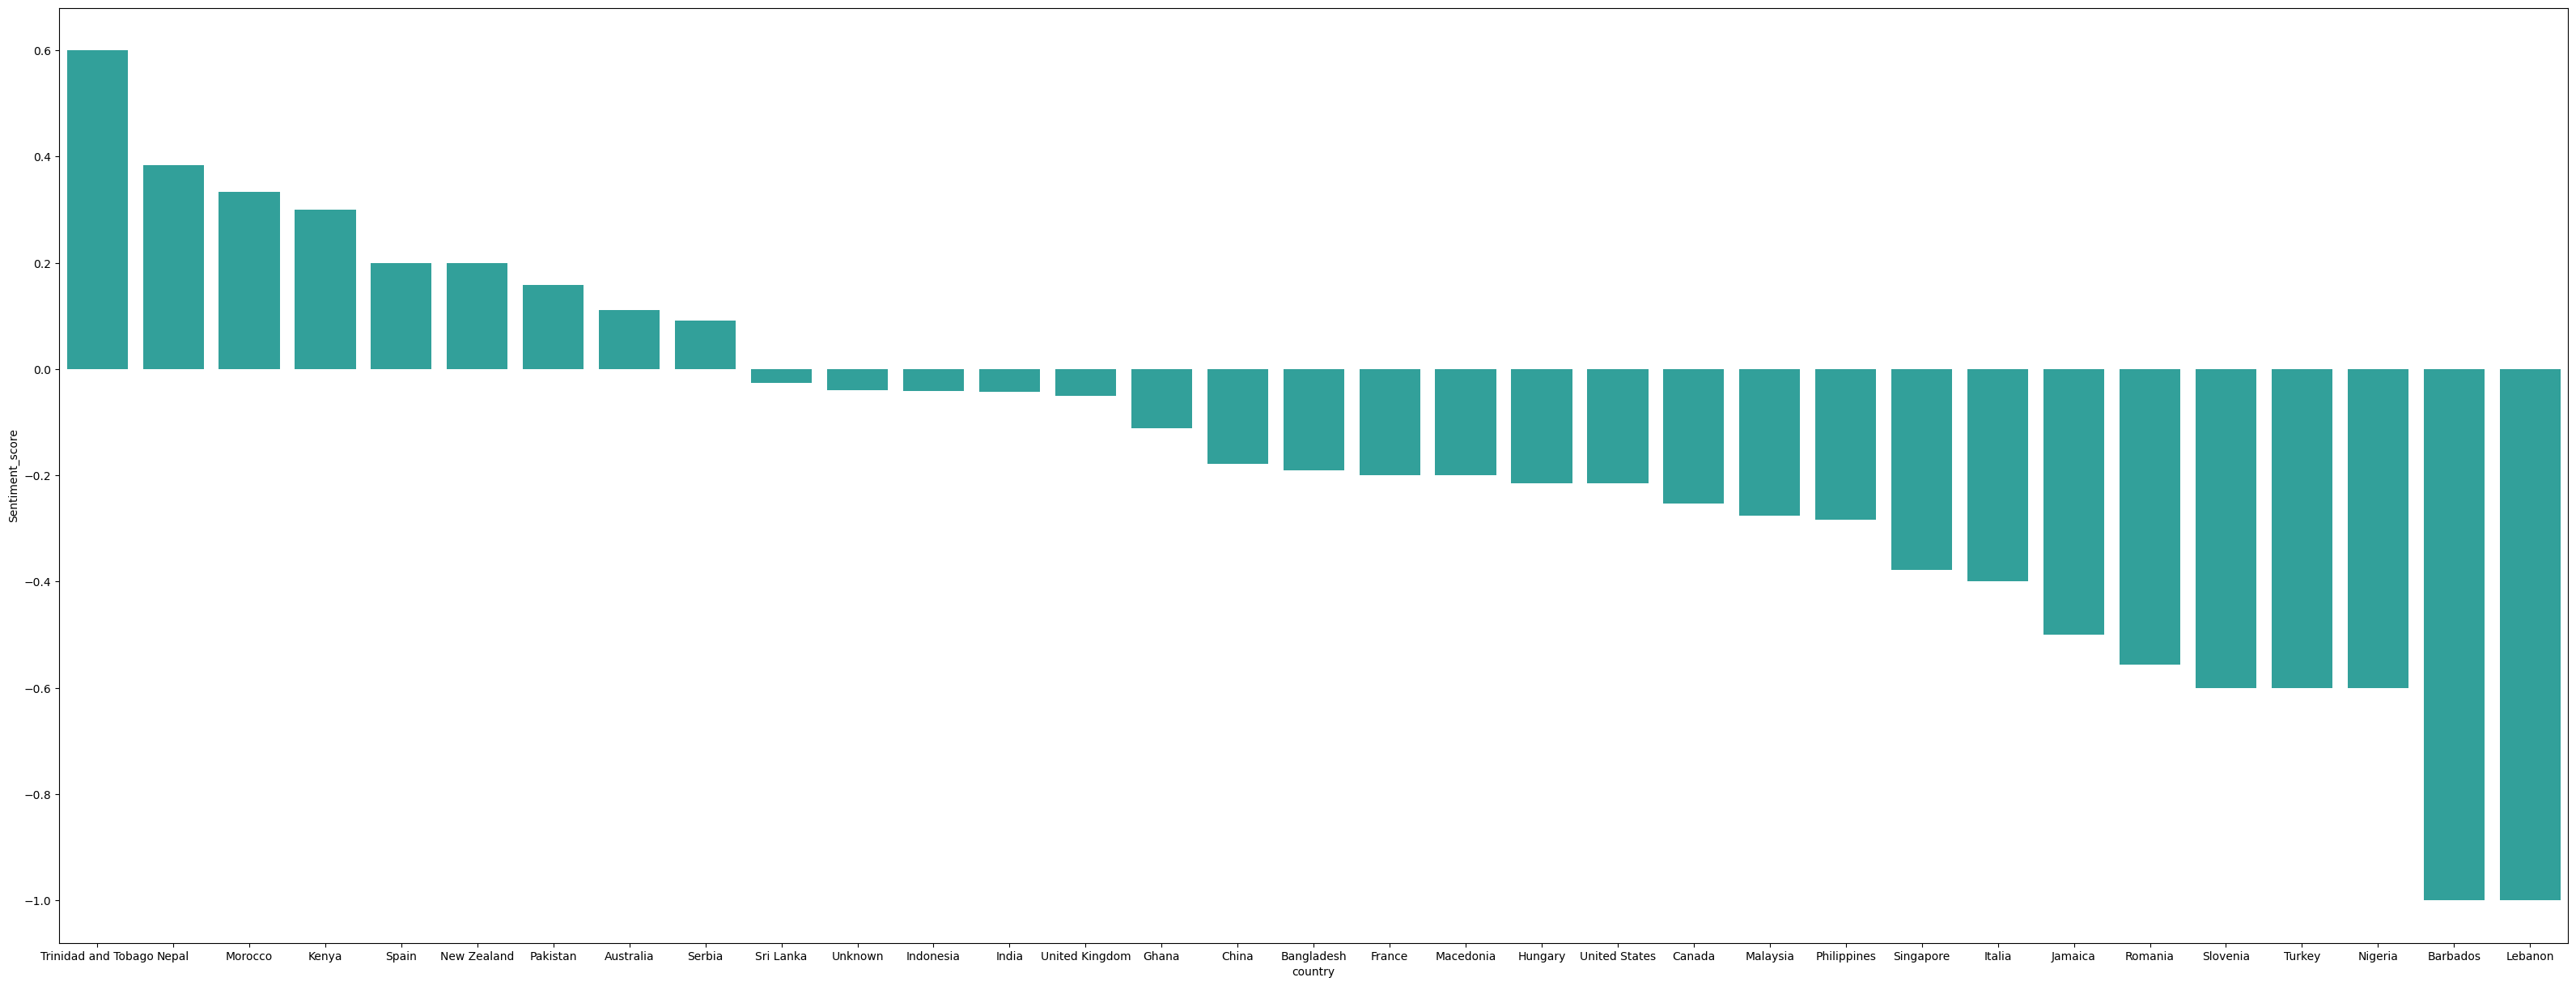

In [44]:
# Plot general sentiments
fig, ax = plt.subplots(figsize=(40,15))
sns.barplot(x='country', y='Sentiment_score', data=df_sent.sort_values(by='Sentiment_score', ascending=False), ax=ax,
                 color="lightseagreen")

Trinidad highest positivity in the sentiment analysis, Lebanon exhibited the highest negativity in the sentiment analysis as shown by graph

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>

### **Conclusion & Insights** <a class="anchor" id="conclusion"></a>

**Conclusion:**

Using a sentiment classification model, I evaluated the sentiments of messages within the NUS SMS Corpus. The model classified messages as either positive or negative, providing insights into the overall sentiment distribution.

**Insights:**

- The sentiment analysis revealed that approximately 64.3% of the messages in the NUS SMS Corpus were classified as negative, while about 35.8% were classified as positive.

- When comparing sentiment by country, Trinidad and Tobago, Nepal, and Morocco exhibited the highest positivity scores, while Lebanon, Barbados, and Nigeria displayed the highest negativity scores in the sentiment analysis.

- Trinidad and Tobago had the highest positivity, while Lebanon showed the highest negativity in the sentiment analysis, as illustrated in the graph.

This analysis helps us understand the prevailing sentiment patterns in the SMS communication dataset, highlighting countries with varying degrees of positivity and negativity in their messages.

#### Future Directions for the Project <a class="anchor" id="future"></a>

1. **Enhanced Sentiment Analysis:** Explore advanced sentiment models to further improve accuracy and classification.

2. **Hyperparameter Optimization:** Fine-tune model parameters for better performance.

3. **Temporal Analysis:** Investigate sentiment changes over time and in response to events.

4. **Message Length Correlation:** Analyze how message length relates to sentiment.

5. **Multilingual Support:** Extend analysis to multiple languages if applicable.

6. **Real-time Sentiment:** Develop real-time analysis for applications like customer service.

7. **Interactive Visualization:** Create user-friendly sentiment trend dashboards.

8. **Emotion Analysis:** Explore a wider range of emotions beyond positive and negative.

9. **User Profiling:** Investigate how demographics affect communication patterns.

10. **Data Expansion:** Collect additional SMS data from diverse sources and periods.

These future steps will enhance the project's capabilities and provide deeper insights into SMS communication patterns.

=> Click here to go back to Stages Section <a class ="anchor" id ="stages"></a>